<a href="https://colab.research.google.com/github/jinad-collab/Pretrained-model-text-classification/blob/main/text_classification_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[
        "# My
Section for Model Training"
      ],

In [1]:
!pip3 install transformers datasets

Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification

DATASET SELECTION & LOADING

In [3]:
dataset = load_dataset("ag_news")
dataset

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})

INSPECT DATASET

In [4]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})


EXTRACT LABELS

In [5]:
labels = dataset["train"].features["label"].names
labels

['World', 'Sports', 'Business', 'Sci/Tech']

MODEL SELECTION

In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

CHOOSE A NEW DATASET

In [7]:
from datasets import load_dataset

dataset = load_dataset("yelp_polarity")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 560000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 38000
    })
})

VIEW LABELS

In [8]:
dataset["train"].features["label"]

ClassLabel(names=['1', '2'])

CONVERTING TO PANDAS

In [9]:
import pandas as pd

df = pd.DataFrame(dataset["train"][:1000])
df.head()

,text,label
0,"Unfortunately, the frustration of being Dr. Go...",0
1,Been going to Dr. Goldberg for over 10 years. ...,1
2,I don't know what Dr. Goldberg was like before...,0
3,I'm writing this review to give you a heads up...,0
4,All the food is great here. But the best thing...,1


Tokenization, Model Checking, Matplotlib Analysis

In [10]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "distilbert-base-uncased-finetuned-sst-2-english"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


TOKENIZING MY DATASET

In [11]:
def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset

Map:   0%|          | 0/38000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 560000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 38000
    })
})

DATA ANALYSIS WITH MATPLOTLIB

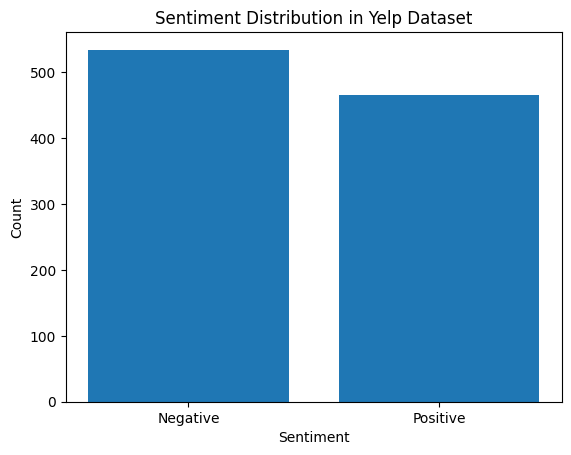

In [12]:
import matplotlib.pyplot as plt

label_counts = df["label"].value_counts()

plt.bar(label_counts.index, label_counts.values)
plt.xticks([0, 1], ["Negative", "Positive"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution in Yelp Dataset")
plt.show()

Text Length check

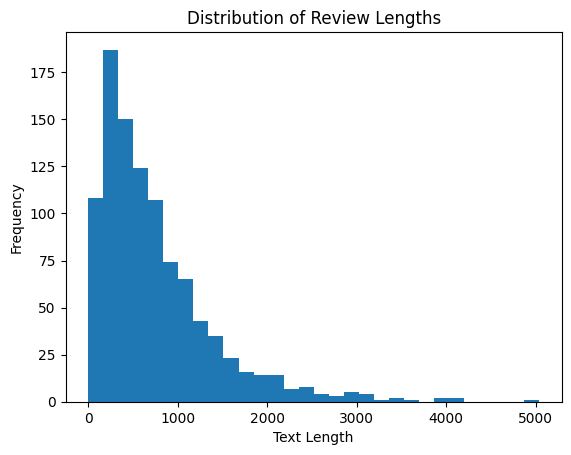

In [13]:
df["text_length"] = df["text"].apply(len)

plt.hist(df["text_length"], bins=30)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()

Average Review Length per Class

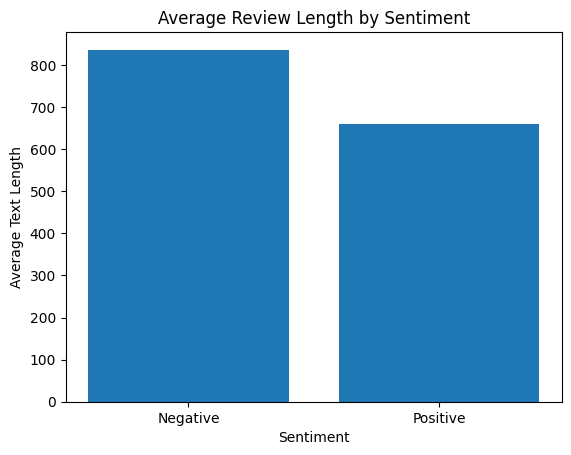

In [14]:
avg_length = df.groupby("label")["text_length"].mean()

plt.bar(["Negative", "Positive"], avg_length)
plt.xlabel("Sentiment")
plt.ylabel("Average Text Length")
plt.title("Average Review Length by Sentiment")
plt.show()